# matplotlib의 triangular grid 사용법

삼각그리드 지원 패키지

In [11]:
import matplotlib.tri as mtri
import numpy as np
import matplotlib.pyplot as plt

삼각그리드 생성

In [4]:
# Triangulation (x,y, triangles)

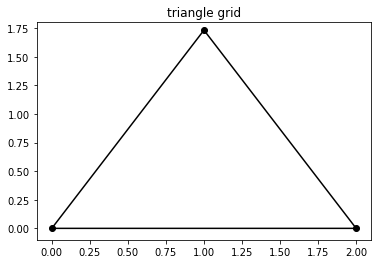

In [13]:
x = np.array([0, 1, 2])
y = np.array([0, np.sqrt(3), 0])
triangles = [[0, 1, 2]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("triangle grid")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.show()

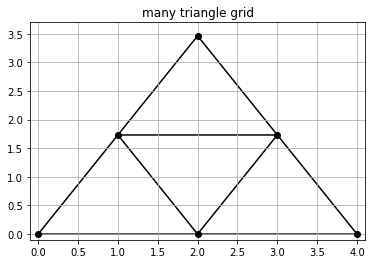

In [17]:
x = np.asarray([0, 1, 2, 3, 4, 2])
y = np.asarray([0, np.sqrt(3), 0, np.sqrt(3), 0, 2*np.sqrt(3)])
triangles = [[0, 1, 2], [2, 3, 4], [1, 2, 3], [1, 3, 5]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("many triangle grid")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.grid()
plt.show()

그리드 세분화

In [18]:
# TriRefiner or  UniformTriRefiner
# refine_triangulation:  단순히 삼각그리드를 세분화
# refine_field : 실제 함수 값에 대해 최적화된 삼각그리드 생성

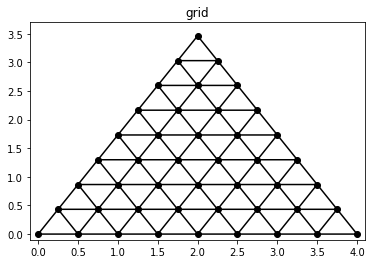

In [21]:
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=2)
plt.title('grid')
plt.triplot(triang2, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

그리드 플롯

In [22]:
# tricontour, tricontourf, plot_trisur , plot_trisurf

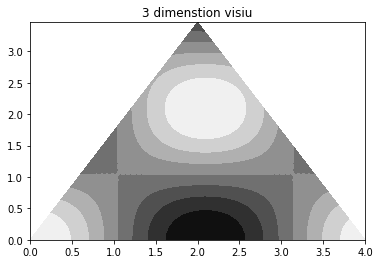

In [23]:
triang5 = refiner.refine_triangulation(subdiv=5)
z5 = np.cos(1.5*triang5.x)*np.cos(1.5*triang5.y)
plt.title("3 dimenstion visiu")
plt.tricontourf(triang5, z5, cmap="gray")
plt.show()

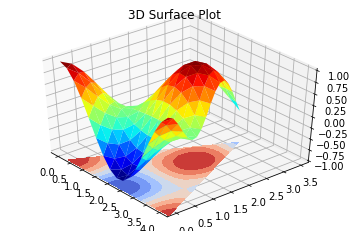

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

triang3 = refiner.refine_triangulation(subdiv=3)
z3 = np.cos(1.5 * triang3.x) * np.cos(1.5 * triang3.y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3D Surface Plot")
ax.plot_trisurf(triang3.x, triang3.y, z3, cmap=cm.jet, linewidth=0.2)
ax.tricontourf(triang3, z3, zdir='z', offset=-1.2, cmap=cm.coolwarm)
ax.set_zlim(-1, 1)
ax.view_init(40, -40)
plt.show()